In [37]:
import numpy as np
import math

points = np.random.uniform(low=-10, high=10, size=(100, 2))
points = np.asarray(points)

def circle(x,radius):
    return math.sqrt(radius **2 - x **2)
    

# point_x = np.random.uniform(-5,5, 100)
# pp = []
# for point in point_x:
#     x, y = circle(point, 3)
#     pp.append((x, y))
# 
# pp = np.array(pp)
y = circle(1,4)
y

3.872983346207417

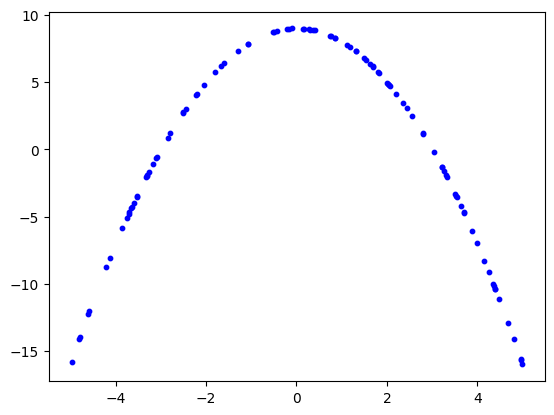

In [26]:
import matplotlib.pyplot as plt

# nums의 최소값과 최대값 구하기
min_num = np.min(pp)
max_num = np.max(pp)

# 1차원 선 그리기
# plt.figure(figsize=(10, 2))

# nums 값들을 선 위에 점으로 시각화
for p in pp:
    plt.scatter(p[0], p[1], color='b', s=10)


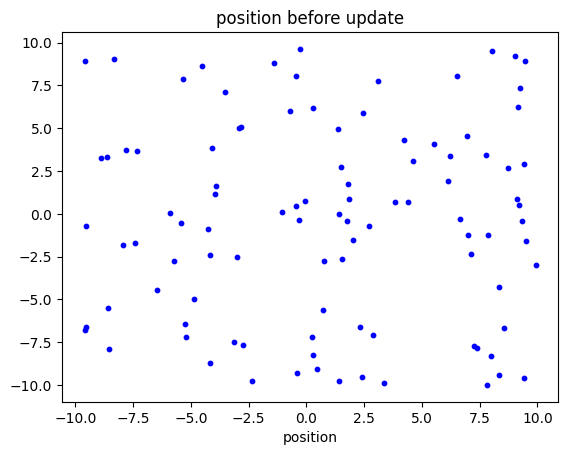

In [27]:
import matplotlib.pyplot as plt

# nums의 최소값과 최대값 구하기
min_num = np.min(points)
max_num = np.max(points)

# 1차원 선 그리기
# plt.figure(figsize=(10, 2))

# nums 값들을 선 위에 점으로 시각화
for point in points:
    plt.scatter(point[0], point[1], color='b', s=10)

plt.title('position before update')
plt.xlabel('position')
plt.show()

In [28]:
from scipy.stats import norm

i = 0

while i < 100:
    
    dens = []
    vec = []
    
    for num in points:
        sum_pdf = 0
        vec_total = 0
        # 여기에 가우시안 넣어야 될듯
        for num2 in points:
            if not np.array_equal(num, num2):
                # gaussian 커널로 점들간 거리에 따라 확률추정
                # 이게 벡터의 크기
                distance = np.linalg.norm(num - num2)
                p = norm.pdf(distance, 0, 1)
                # 점 num에서 확률추정
                sum_pdf += p
                vec_total += p * (num-num2)
                
        dens.append(sum_pdf / (len(points)-1))
        vec.append(vec_total)
    
    dens /= np.sum(dens)
    points += vec
    i += 1

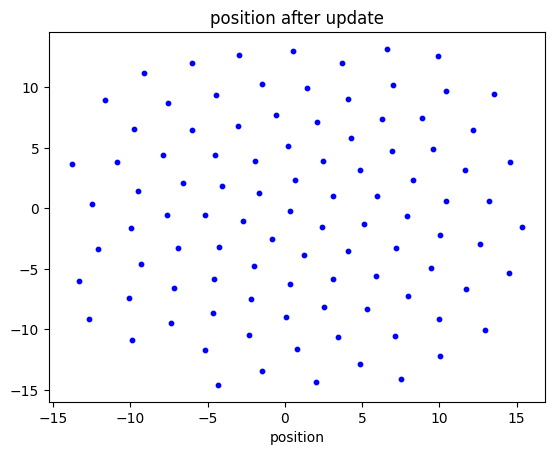

In [29]:
import matplotlib.pyplot as plt

# nums의 최소값과 최대값 구하기
min_num = np.min(points)
max_num = np.max(points)

# 1차원 선 그리기
# plt.figure(figsize=(10, 2))

# nums 값들을 선 위에 점으로 시각화
for point in points:
    plt.scatter(point[0], point[1], color='b', s=10)

plt.title('position after update')
plt.xlabel('position')
plt.show()